### Данные
https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data

http://matplotlib.org/users/pyplot_tutorial.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Путь к загруженным данным

In [5]:
WORKDIR = '/Users/npenzin/Downloads/names'

In [6]:
df = pd.DataFrame(np.random.randn(50, 3), columns=['Z', 'B', 'C'])
df.head(10)

,Z,B,C
0,0.302755,0.759806,0.783566
1,0.812568,-1.815815,1.358516
2,-0.433070,0.086350,-0.078776
3,3.009464,0.094306,-0.602655
4,-2.623747,0.591355,0.068611
5,0.181501,1.159598,-0.616517
6,-1.154700,-0.379149,-0.206887
7,-0.203179,0.175813,0.370219
8,0.756963,-0.151329,0.692484
9,1.549878,-0.291521,-0.320093


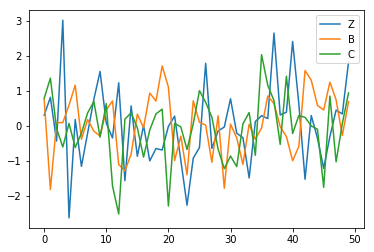

In [7]:
df.plot()

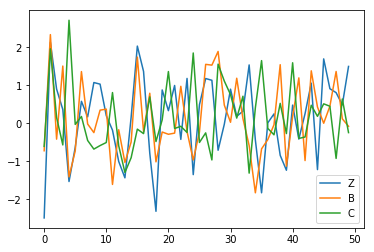

In [5]:
plot = df.plot()
fig = plot.get_figure()
fig.savefig("output.png")

In [8]:
names_by_year = {}
for year in range(1900, 2001, 10):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(WORKDIR, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [9]:
names_all.head(10)

Name Gender  Count
Year Pos                         
1900 0         Mary      F  16706
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414

In [10]:
names_all.tail(10)

Name Gender  Count
Year Pos                        
2000 29754    Zeev      M      5
     29755  Zefram      M      5
     29756  Zekiel      M      5
     29757   Zelig      M      5
     29758   Zemar      M      5
     29759    Zeph      M      5
     29760   Zeven      M      5
     29761   Ziggy      M      5
     29762      Zo      M      5
     29763   Zyier      M      5

In [11]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.head(10)

Count
Year Name          
1900 Aaron      103
     Abbie      112
     Abby         7
     Abe         56
     Abel        15
     Abigail     14
     Abner       21
     Abraham    100
     Abram       18
     Abron        5

In [12]:
name_dynamics.query('Name == ["John", "Mary", "William"]')

Count
Year Name          
1900 John      9875
     Mary     16781
     William   8623
1910 John     11538
     Mary     22947
     William   8881
1920 John     57197
     Mary     71170
     William  50357
1930 John     52831
     Mary     64482
     William  47552
1940 John     54985
     Mary     56501
     William  44923
1950 John     79606
     Mary     65604
     William  60826
1960 John     76360
     Mary     51646
     William  49518
1970 John     58825
     Mary     19307
     William  39114
1980 John     35525
     Mary     11528
     William  25870
1990 John     29151
     Mary      8710
     William  24950
2000 John     20114
     Mary      6197
     William  20696

In [13]:
name_dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name')

Count                  
Name     John     Mary  William
Year                           
1900   9875.0  16781.0   8623.0
1910  11538.0  22947.0   8881.0
1920  57197.0  71170.0  50357.0
1930  52831.0  64482.0  47552.0
1940  54985.0  56501.0  44923.0
1950  79606.0  65604.0  60826.0
1960  76360.0  51646.0  49518.0
1970  58825.0  19307.0  39114.0
1980  35525.0  11528.0  25870.0
1990  29151.0   8710.0  24950.0
2000  20114.0   6197.0  20696.0

Метод `unstack`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html

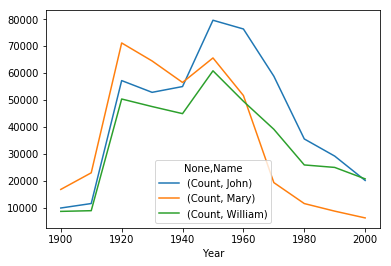

In [14]:
name_dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name').plot()

Метод `plot`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [15]:
gender_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Gender']).sum()
gender_dynamics.head(10)

Count
Year Gender         
1900 F        299810
     M        150486
1910 F        396502
     M        194215
1920 F       1198288
     M       1064417
1930 F       1125853
     M       1097258
1940 F       1143386
     M       1158975

In [16]:
gender_dynamics_cols = gender_dynamics.unstack('Gender')
gender_dynamics_cols

Count         
Gender        F        M
Year                    
1900     299810   150486
1910     396502   194215
1920    1198288  1064417
1930    1125853  1097258
1940    1143386  1158975
1950    1713259  1790871
1960    2022104  2132705
1970    1748270  1859528
1980    1660152  1784266
1990    1897940  2052780
2000    1814922  1962744

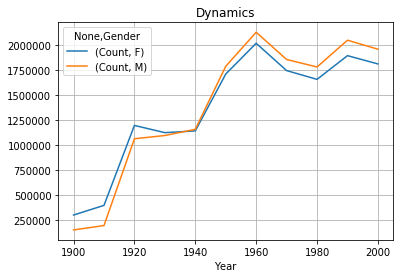

In [17]:
gender_dynamics_cols.plot(title='Dynamics', grid=True)

Метод `bar`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html

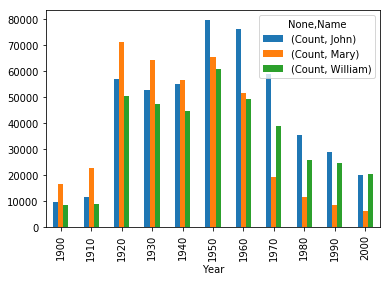

In [18]:
name_dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name').plot.bar()

Метод `pie`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.pie.html

In [19]:
names_for_pie = names_all.groupby('Name').sum().sort_values(by='Count', ascending=False).head(5)
names_for_pie

,Count
Name,
James,497624
John,486007
Robert,473570
Michael,424835
Mary,394873


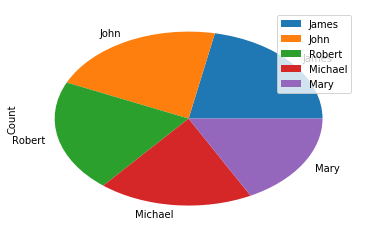

In [20]:
names_for_pie.plot.pie(y='Count')

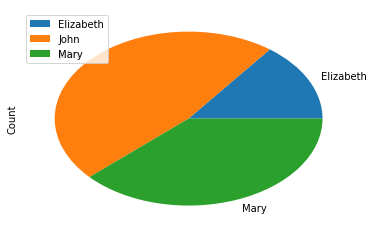

In [21]:
names_all.groupby('Name').sum().query('Name == ["John", "Mary", "Elizabeth"]').plot.pie(y='Count')

In [23]:
names = pd.read_csv('{}/yob2000.txt'.format(WORKDIR), names=['Name','Gender','Count'])
names.head(10)

,Name,Gender,Count
0,Emily,F,25953
1,Hannah,F,23078
2,Madison,F,19967
3,Ashley,F,17996
4,Sarah,F,17691
5,Alexis,F,17628
6,Samantha,F,17265
7,Jessica,F,15706
8,Elizabeth,F,15092
9,Taylor,F,15077


In [24]:
names['Len'] = names.apply(lambda row: len(row.Name), axis=1)
names.head(10)

,Name,Gender,Count,Len
0,Emily,F,25953,5
1,Hannah,F,23078,6
2,Madison,F,19967,7
3,Ashley,F,17996,6
4,Sarah,F,17691,5
5,Alexis,F,17628,6
6,Samantha,F,17265,8
7,Jessica,F,15706,7
8,Elizabeth,F,15092,9
9,Taylor,F,15077,6


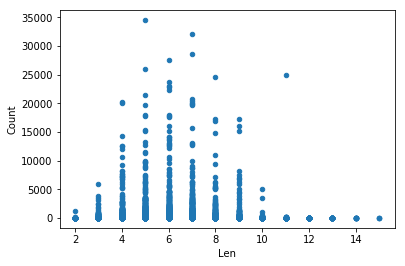

In [25]:
names.plot.scatter(x='Len', y='Count')

In [26]:
names.groupby('Gender').sum()

,Count,Len
Gender,,
F,1814922,111827
M,1962744,74160


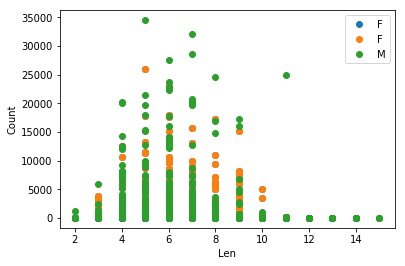

In [27]:
def scatter_len(group):
    plt.plot(group['Len'], group['Count'], 'o', label=group.name)
    
names.groupby('Gender').apply(scatter_len)
plt.xlabel('Len')
plt.ylabel('Count')
plt.legend()

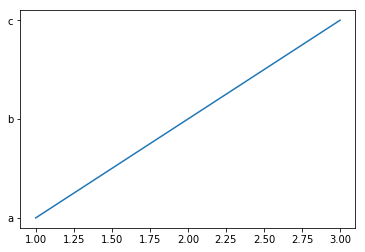

In [28]:
plt.plot([1,2,3], ['a','b','c'])

In [29]:
names

,Name,Gender,Count,Len
0,Emily,F,25953,5
1,Hannah,F,23078,6
2,Madison,F,19967,7
3,Ashley,F,17996,6
4,Sarah,F,17691,5
5,Alexis,F,17628,6
6,Samantha,F,17265,8
7,Jessica,F,15706,7
8,Elizabeth,F,15092,9
9,Taylor,F,15077,6


""


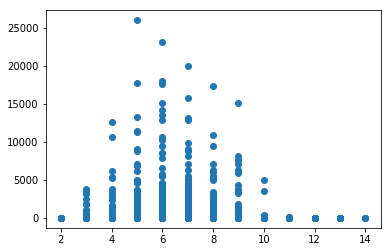

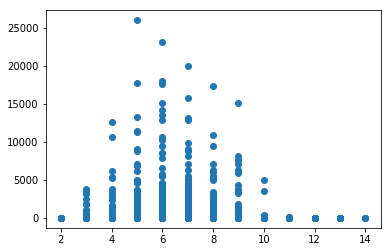

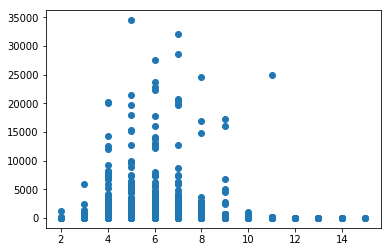

In [30]:
def scatter_len(group):
    plt.figure()
    plt.plot(group['Len'], group['Count'], 'o', label=group.name)
    
names.groupby('Gender').apply(scatter_len)

# Holoviews! ~~Bokeh~~


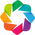

In [34]:
import holoviews as hv # pip install holoviews bokeh
hv.extension('bokeh')

In [35]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

hv.Curve([x,y])

:Curve   [x]   (y)

In [36]:
name_common_dynamics = names_all.groupby(level=0).sum()
name_common_dynamics.reset_index(level=0, inplace=True)
name_common_dynamics

,Year,Count
0,1900,450296
1,1910,590717
2,1920,2262705
3,1930,2223111
4,1940,2302361
5,1950,3504130
6,1960,4154809
7,1970,3607798
8,1980,3444418
9,1990,3950720


In [37]:
hv.Bars(name_common_dynamics, 'Year', values='Count')

:Bars   [Year]   (Count)

In [38]:
from bokeh.sampledata.autompg import autompg
autompg.head(10)


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [39]:
hv.Bars(autompg, 'cyl', values='mpg', title="Total MPG by CYL")

:Bars   [cyl]   (mpg,displ,hp,weight,accel,yr,origin,name)

### Домашнее задание

Результат по выполнению заданий 4.1-4.3 необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в github.

В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: данные о популярности имен для новорожденных, скачивается по ссылке https://www.ssa.gov/oact/babynames/names.zip
Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

Результат по выполнению заданий необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в github.

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
3. Построить круговую диаграмму по количеству ТОП-10 популярных имен, начинающихся на R за 1950 год.
4. Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.


### Полезные ссылки

* [Ликбез по Matplotlib](https://edunow.su/site/content/python-matplotlib)
* http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
* http://matplotlib.org/users/pyplot_tutorial.html
* https://github.com/d3/d3/wiki/Gallery
* http://datavizcatalogue.com/
* https://plot.ly/
* http://www.informationisbeautiful.net/
